# Getting Started

According to Yann LeCun, “adversarial training is the coolest thing since sliced bread”. I’m inclined to believe so because I don’t think sliced bread ever created this much buzz and excitement within the deep learning community. Generative Adversarial Networks are a set of models that basically learn to create synthetic data that is similar to input data it's given. In more formal terms, a GAN is a generative model that learns the probability distribution (or data distribution) of the training examples it is given. From this distribution, we can then create sample outputs. GANs have seen their largest progress with image training examples, but this idea of modeling data distributions is one that can be applied with other forms of input.In the case described in today’s post, we’ll be creating a GAN that learns to generate synthetic, yet readable, images of MNIST digits. 
얀 르쿤 (Yann LeCun)에 따르면, "적대적인 훈련은 얇게 썬 빵 이후 가장 멋진 일"이라고합니다. 얇게 썬 빵은 깊은 학습 공동체 내에서 이렇게 많은 소란과 흥분을 일으켰다 고 생각하지 않기 때문에 나는 믿을 의향이 있습니다. Generic Adversarial Networks는 주어진 입력 데이터와 유사한 합성 데이터를 생성하는 것을 기본적으로 배우는 일련의 모델입니다. 보다 공식적인 용어로, GAN은 주어진 사례의 확률 분포 (또는 데이터 분포)를 학습하는 생성 모델입니다. 이 분포로부터 샘플 출력을 생성 할 수 있습니다. GAN은 이미지 트레이닝 예제를 통해 가장 큰 진전을 보았지만 데이터 배포 모델링에 대한이 아이디어는 다른 형태의 입력과 함께 적용 할 수있는 아이디어입니다. 오늘의 포스트에서 설명한 경우 합성을 생성하는 것을 배우는 GAN이 생성 될 것입니다 , 아직 읽을 수있는, MNIST 자리의 이미지.

In this notebook, we'll be explaining generative adversarial networks, and how you can use them to create a generator network that can create realistic MNIST digits through Tensorflow
이 노트에서는 생성 적 적자 네트워크에 대해 설명하고 Tensorflow를 통해 현실적인 MNIST 숫자를 생성 할 수있는 발전기 네트워크를 만드는 방법에 대해 설명합니다.

# GAN Architecture

Let’s dig a little bit deeper into the structure of this model. The basic idea of these networks is that you have 2 models, a generative model and a discriminative model. 
이 모델의 구조를 조금 더 자세히 살펴 보겠습니다. 이 네트워크의 기본 아이디어는 생성 모델과 차별 모델이라는 두 가지 모델을 가지고 있다는 것입니다.

![caption](Images/GAN1.png)

The discriminative model has the task of determining whether a given image looks natural (an image from the dataset) or looks like it has been artificially created. This is basically a binary classifier that will take the form of a normal convolutional neural network (CNN).  The task of the generator is to create natural looking images that are similar to the original data distribution. 
식별 모델은 주어진 이미지가 자연스럽게 보이는지 (데이터 세트의 이미지) 또는 인위적으로 생성 된 것처럼 보이는지를 결정하는 작업을합니다. 이것은 기본적으로 정상 컨볼 루션 신경망 (CNN)의 형태를 취할 이진 분류 자입니다. 생성기의 작업은 원본 데이터 분포와 유사한 자연스러운 이미지를 만드는 것입니다.

This can be thought of as a zero-sum or minimax two player game. The analogy used in the paper is that the generative model is like “a team of counterfeiters, trying to produce and use fake currency” while the discriminative model is like “the police, trying to detect the counterfeit currency”. The generator is trying to fool the discriminator while the discriminator is trying to not get fooled by the generator. As the models train through alternating optimization, both methods are improved until a point where the “counterfeits are indistinguishable from the genuine articles”. There are specific game theory concepts that prove there is indeed an equilibrium to this game where the generator gets so good that the discriminator outputs a probability of ½ for every input. 
이것은 제로섬 또는 미니 맥스 2 인 게임으로 생각할 수 있습니다. 논문에서 사용 된 비유는 생성 모델이 "가짜 화폐를 생산하고 사용하려고 시도하는 위조자 팀"인 것과 차별 모델은 "위조 통화 감지를 시도하는 경찰"과 같은 것입니다. 판별 기가 발전기에 속지려고 시도하는 동안 발전기가 판별자를 속일려고합니다. 모델이 교대 최적화를 통해 훈련함에 따라 두 방법 모두 "위조품이 정품과 구별되지 않는"지점까지 개선됩니다. 이 게임에 대한 평형이 존재한다는 것을 증명하는 특정 게임 이론 개념이 있습니다. 여기서 발전기는 각 입력에 대해 판별자가 ½의 확률을 출력하도록 아주 잘됩니다.

# Our Task

Today, we’re going to create a GAN that will generate MNIST digits that can fool even the best classifiers (and humans too of course). Here’s what we’re going to need:

- Real MNIST training images
- A generator network that takes in a random noise vector and produces a synthetic image
- A discriminator network (a CNN) that learns to distinguish between real and synthetic images. You can think of it as just a binary classifier (1 for real image, 0 for fake)
- An optimization procedure that jointly updates both networks through SGD. This is the tricky part as we need to train the generator network to fool the discriminator network, which means that we have unique gradient flows and labels. 
- Tensorflow - Our choice of Deep Learning framework

Let’s get started. 

# Loading MNIST Data

첫째, 우리의 import으로 시작합시다. 우리는 주로 Tensorflow가 필요할 것입니다. 또한 Numpy를 가져 와서 일부 매트릭스, 숫자를 생성하는 임의의 라이브러리 및 이미지 데이터를 시각화하는 Matplotlib를 import했습니다.

In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

이제 MNIST 이미지를 가져와야합니다. 이를 위해 read_data_sets라는 TF 함수를 호출합니다. 이것은 MNIST 데이터베이스에 있는 55,000 개의 교육 예제를 로드합니다.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


위에서 만든 mnist 변수에는 실제로 이미지와 레이블이 모두 들어 있습니다. 이제 이미지를 분리 해 봅시다. 55,000 개의 이미지가 있고 각 이미지는 28x28 이미지입니다.

In [3]:
x_train = mnist.train.images[:55000,:]
x_train.shape

(55000, 784)

Let's look at what a random image might look like. 

무작위 이미지가 어떻게 보일지 살펴 보겠습니다.

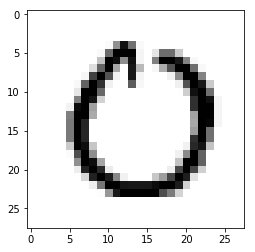

In [4]:
randomNum = random.randint(0,55000)
image = x_train[randomNum].reshape([28,28])
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

# Discriminator Network

   Now, using our classical CS concept of modularity, let’s define a CNN classifier function that takes in an image (of size 28 x 28 x 1) as input. The output will be a single scalar number activation that describes whether or not the input image is real or not.
   
   이제 모듈성이라는 고전적인 CS 개념을 사용하여 이미지 (크기 28 x 28 x 1)를 입력으로 사용하는 CNN 분류 기능을 정의 해 보겠습니다. 출력은 입력 이미지가 실제인지 아닌지를 설명하는 단일 스칼라 번호 활성화입니다.

![caption](Images/GAN2.png)

In order to do that, let's first define some functions that will help us with creating CNNs in Tensorflow

먼저 Tensorflow에서 CNN을 만드는 데 도움이되는 몇 가지 기능을 정의 해 보겠습니다.

In [5]:
def conv2d(x, W):
  return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def avg_pool_2x2(x):
  return tf.nn.avg_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Now, let’s see how we’re going to compose this network. We’ll start off by passing the image through a convolutional layer. First, we create our weight and bias variables through tf.get_variable. Our first weight matrix (or filter) will be of size 5x5 and will have a output depth of 8. It will be randomly initialized from a normal distribution.

이제 우리가 어떻게 이 네트워크를 구성하는지 봅시다. 우리는 컨벌루션 레이어를 통해 이미지를 전달함으로써 시작할 것입니다. 먼저 tf.get_variable을 통해 가중치 및 바이어스 변수를 만듭니다. 첫 번째 가중치 행렬 (또는 필터)은 크기가 5x5이고 출력 깊이가 8입니다. 정규 분포에서 무작위로 초기화됩니다.

Then, we’ll call the function tf.nn.conv2d() through our a helper function called conv2d. tf.nn.conv2d() is the Tensorflow’s function for a common convolution. It takes in 4 arguments. The first is the input volume (our 28 x 28 x 1 image in this case). The next argument is the filter/weight matrix. Finally, you can also change the stride and padding of the convolution. Those two values affect the dimensions of the output volume. 

그런 다음 conv2d라는 도우미 함수를 통해 tf.nn.conv2d () 함수를 호출합니다. tf.nn.conv2d ()는 일반적인 컨볼 루션을위한 Tensorflow의 기능입니다. 4 개의 인수가 필요합니다. 첫 번째는 입력 볼륨입니다 (이 경우 28x28x1 이미지). 다음 인수는 필터 / 가중치 행렬입니다. 마지막으로 컨볼 루션의 보폭과 패딩을 변경할 수도 있습니다. 이 두 값은 출력 볼륨의 크기에 영향을줍니다.

As with any convolutional neural network, this module is repeated, and then followed by a series of fully connected layers. At the end of the network, we do a final matrix multiply and return the activation value. For those of you comfortable with CNNs, this is just a simple binary classifier. Nothing fancy. 

임의의 길쌈 신경 네트워크와 마찬가지로 이 모듈을 반복 한 다음 일련의 완전히 연결된 레이어가 이어집니다. 네트워크가 끝날 때 우리는 마지막 행렬을 곱하고 활성화 값을 반환합니다. CNN에 익숙한 사용자에게는 간단한 바이너리 분류 자입니다. 멋진 일은 없어.

This architecture for this network is based on Tensorflow's sample CNN classifier model that they have explained in detail here: https://www.tensorflow.org/tutorials/mnist/pros/

이 네트워크에 대한이 아키텍처는 Tensorflow의 샘플 CNN 분류기 모델 (자세한 내용은 여기에서 설명 함)을 기반으로합니다. https://www.tensorflow.org/tutorials/mnist/pros/

In [6]:
def discriminator(x_image, reuse=False):
    if (reuse):
        tf.get_variable_scope().reuse_variables()
    #First Conv and Pool Layers
    W_conv1 = tf.get_variable('d_wconv1', [5, 5, 1, 8], initializer=tf.truncated_normal_initializer(stddev=0.02))
    b_conv1 = tf.get_variable('d_bconv1', [8], initializer=tf.constant_initializer(0))
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = avg_pool_2x2(h_conv1)

    #Second Conv and Pool Layers
    W_conv2 = tf.get_variable('d_wconv2', [5, 5, 8, 16], initializer=tf.truncated_normal_initializer(stddev=0.02))
    b_conv2 = tf.get_variable('d_bconv2', [16], initializer=tf.constant_initializer(0))
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = avg_pool_2x2(h_conv2)

    #First Fully Connected Layer
    W_fc1 = tf.get_variable('d_wfc1', [7 * 7 * 16, 32], initializer=tf.truncated_normal_initializer(stddev=0.02))
    b_fc1 = tf.get_variable('d_bfc1', [32], initializer=tf.constant_initializer(0))
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*16])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    #Second Fully Connected Layer
    W_fc2 = tf.get_variable('d_wfc2', [32, 1], initializer=tf.truncated_normal_initializer(stddev=0.02))
    b_fc2 = tf.get_variable('d_bfc2', [1], initializer=tf.constant_initializer(0))

    #Final Layer
    y_conv=(tf.matmul(h_fc1, W_fc2) + b_fc2)
    return y_conv

# Generator Network

Now that we have our discriminator defined, let’s take a look at the generator module. For this, we’ll be basing our model off the generator introduced in the DCGAN paper (link: https://arxiv.org/pdf/1511.06434v2.pdf). You can think of the generator as being a kind of reverse ConvNet. With CNNs, the goal is to transform a 2 or 3 dimensional matrix of pixel values into a single probability. A generator, however, seeks to take a d-dimensional noise vector and upsample it to become a 28 x 28 image. This upsampling is done through a convolutional transpose (or deconvolution) layer. ReLUs and Batch Norm are then used to stabilize the outputs of each layer.

discriminator를 정의 했으므로 generator 모듈을 살펴 보겠습니다. 이를 위해 우리는 DCGAN 논문 (https://arxiv.org/pdf/1511.06434v2.pdf 링크)에 소개된 generator를 모델로 삼을 것입니다. generator가 일종의 reverse ConvNet인 것으로 생각할 수 있습니다. CNN을 사용하여 목표는 픽셀 값의 2 또는 3 차원 행렬을 단일 확률로 변환하는 것입니다. 그러나 생성기(generator)는 d 차원 잡음 벡터를 취하여 이를 28 x 28 이미지로 업 샘플링하려고합니다. 이 업 샘플링은 컨벌루션 전치 (convolutional transpose, 또는 deconvolution) 레이어를 통해 수행됩니다. 그런 다음 ReLUs와 Batch Norm을 사용하여 각 레이어의 출력을 안정화합니다.

The structure of the generator is very similar to that of the discriminator, except we're calling the convolution transpose method, instead of the conv2d one. 

생성자의 구조는 conv2d 대신 convolution transpose 메서드를 호출한다는 점을 제외하고는 판별 자의 구조와 매우 유사합니다.

The conv transpose + relu + batch norm pipeline is repeated 4 times so that the output volume grows larger and larger until a 28 x 28 x 1 image is formed.

conv transpose + relu + batch norm 파이프 라인을 4 번 반복하여 28 x 28 x 1 이미지가 형성 될 때까지 출력 볼륨이 커집니다.

In [7]:
def generator(z, batch_size, z_dim, reuse=False):
    if (reuse):
        tf.get_variable_scope().reuse_variables()
    g_dim = 64 #Number of filters of first layer of generator 
    c_dim = 1 #Color dimension of output (MNIST is grayscale, so c_dim = 1 for us)
    s = 28 #Output size of the image
    s2, s4, s8, s16 = int(s/2), int(s/4), int(s/8), int(s/16) #We want to slowly upscale the image, so these values will help
                                                              #make that change gradual.

    h0 = tf.reshape(z, [batch_size, s16+1, s16+1, 25])
    h0 = tf.nn.relu(h0)
    #Dimensions of h0 = batch_size x 2 x 2 x 25

    #First DeConv Layer
    output1_shape = [batch_size, s8, s8, g_dim*4]
    W_conv1 = tf.get_variable('g_wconv1', [5, 5, output1_shape[-1], int(h0.get_shape()[-1])], 
                              initializer=tf.truncated_normal_initializer(stddev=0.1))
    b_conv1 = tf.get_variable('g_bconv1', [output1_shape[-1]], initializer=tf.constant_initializer(.1))
    H_conv1 = tf.nn.conv2d_transpose(h0, W_conv1, output_shape=output1_shape, strides=[1, 2, 2, 1], padding='SAME')
    H_conv1 = tf.contrib.layers.batch_norm(inputs = H_conv1, center=True, scale=True, is_training=True, scope="g_bn1")
    H_conv1 = tf.nn.relu(H_conv1)
    #Dimensions of H_conv1 = batch_size x 3 x 3 x 256

    #Second DeConv Layer
    output2_shape = [batch_size, s4 - 1, s4 - 1, g_dim*2]
    W_conv2 = tf.get_variable('g_wconv2', [5, 5, output2_shape[-1], int(H_conv1.get_shape()[-1])], 
                              initializer=tf.truncated_normal_initializer(stddev=0.1))
    b_conv2 = tf.get_variable('g_bconv2', [output2_shape[-1]], initializer=tf.constant_initializer(.1))
    H_conv2 = tf.nn.conv2d_transpose(H_conv1, W_conv2, output_shape=output2_shape, strides=[1, 2, 2, 1], padding='SAME')
    H_conv2 = tf.contrib.layers.batch_norm(inputs = H_conv2, center=True, scale=True, is_training=True, scope="g_bn2")
    H_conv2 = tf.nn.relu(H_conv2)
    #Dimensions of H_conv2 = batch_size x 6 x 6 x 128

    #Third DeConv Layer
    output3_shape = [batch_size, s2 - 2, s2 - 2, g_dim*1]
    W_conv3 = tf.get_variable('g_wconv3', [5, 5, output3_shape[-1], int(H_conv2.get_shape()[-1])], 
                              initializer=tf.truncated_normal_initializer(stddev=0.1))
    b_conv3 = tf.get_variable('g_bconv3', [output3_shape[-1]], initializer=tf.constant_initializer(.1))
    H_conv3 = tf.nn.conv2d_transpose(H_conv2, W_conv3, output_shape=output3_shape, strides=[1, 2, 2, 1], padding='SAME')
    H_conv3 = tf.contrib.layers.batch_norm(inputs = H_conv3, center=True, scale=True, is_training=True, scope="g_bn3")
    H_conv3 = tf.nn.relu(H_conv3)
    #Dimensions of H_conv3 = batch_size x 12 x 12 x 64

    #Fourth DeConv Layer
    output4_shape = [batch_size, s, s, c_dim]
    W_conv4 = tf.get_variable('g_wconv4', [5, 5, output4_shape[-1], int(H_conv3.get_shape()[-1])], 
                              initializer=tf.truncated_normal_initializer(stddev=0.1))
    b_conv4 = tf.get_variable('g_bconv4', [output4_shape[-1]], initializer=tf.constant_initializer(.1))
    H_conv4 = tf.nn.conv2d_transpose(H_conv3, W_conv4, output_shape=output4_shape, strides=[1, 2, 2, 1], padding='VALID')
    H_conv4 = tf.nn.tanh(H_conv4)
    #Dimensions of H_conv4 = batch_size x 28 x 28 x 1

    return H_conv4

## Generating a Sample Image 

자, 이제 우리는 생성기와 discriminator 함수를 정의했습니다. 훈련받지 않은 생성기의 샘플 출력이 어떻게 보이는지 봅시다. Tensorflow를 사용하여 먼저 세션을 정의한 다음 생성자에 대한 입력을 위한 placeholder를 만들어야 합니다. placeholder의 목적은 기본적으로 Tensorflow에 "나중에 임의의 z 벡터에 입력 할 것입니다. 그러나 지금은 이 placeholder 변수를 대신 정의 할 것입니다." Tensorflow는 입력의 크기를 미리 알 수 있습니다. placeholder의 모양은 None x z_dimensions입니다. None 키워드는 세션 런타임에서 값을 판별 할 수 있음을 의미합니다. 가변 일괄 처리 크기를 가질 수 있도록 일반적으로 None을 첫 번째 차원으로 사용합니다 (일괄 처리 크기가 16 인 경우 생성기로의 입력은 16 x 100입니다). None 키워드를 사용하면 나중에 batch_size를 지정할 필요가 없습니다.

In [8]:
sess = tf.Session()
z_dimensions = 100
z_test_placeholder = tf.placeholder(tf.float32, [None, z_dimensions])

이제 생성기의 출력을 보유하는 변수 (sample_image)를 만들고 입력으로 사용할 임의 잡음 벡터를 초기화합니다. np.random.normal 함수는 세 개의 인수를가집니다. 첫 번째와 두 번째는 우리가 원하는 출력 분포의 범위를 정의하고 (우리의 경우 -1와 1 사이), 세 번째는 벡터의 모양 (1 x 100)을 정의합니다.

In [9]:
sample_image = generator(z_test_placeholder, 1, z_dimensions)
test_z = np.random.normal(-1, 1, [1,z_dimensions])

Next, we initialize all the variables, feed our test_z into the placeholder, and run the session. The sess.run function has two arguments. The first is called the "fetches" argument. It defines the value for you're interested in computing. For example, in our case, we want to see what the output of the generator is. If you look back at the last code snippet, the output of the generator function is stored in sample_image. Therefore, we'll use sample_image for our first argument. The second argument is where we input our feed_dict. This data structure is where we provide inputs to all of our placeholders. In our example, we need to feed our test_z variable into the z placeholder we defined earlier. 

다음으로, 모든 변수를 초기화하고, test_z를 플레이스 홀더에 넣고, 세션을 실행합니다. sess.run 기능에는 두 개의 인수가 있습니다. 첫 번째 인수는 "fetches"인수라고합니다. 그것은 계산하려는 값를 정의합니다. 예를 들어, 우리의 경우 우리는 생성기의 출력이 무엇인지 보고 싶습니다. 마지막 코드 스니펫을 살펴보면 generator 함수의 출력이 sample_image에 저장됩니다. 따라서 첫 번째 인수에 sample_image를 사용합니다. 두 번째 인수는 feed_dict를 입력하는 곳입니다. 이 데이터 구조는 모든 플레이스홀더에 대한 입력을 제공하는 곳입니다. 이 예에서는 앞에서 정의한 z 플레이스홀더에 test_z 변수를 제공해야 합니다.

In [10]:
sess.run(tf.global_variables_initializer())
temp = (sess.run(sample_image, feed_dict={z_test_placeholder: test_z}))

Finally, we can view the output through matplotlib. 

마침내 matplotlib를 통해 출력을 볼 수 있습니다.

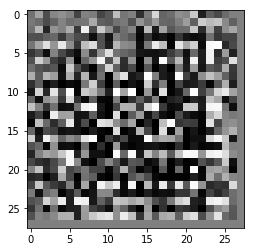

In [11]:
my_i = temp.squeeze()
plt.imshow(my_i, cmap='gray_r')
plt.show()

Not a very convincing MNIST digit right? Let’s look at how we can make our generator better. Enter loss functions and optimization!

매우 이상한 MNIST 숫자 아닙니까? 생성기를 어떻게 개선 할 수 있는지 보도록 하겠습니다. 손실 함수 및 최적화를 입력하십시오!

# Training a GAN

In [12]:
batch_size = 16
tf.reset_default_graph() #Since we changed our batch size (from 1 to 16), we need to reset our Tensorflow graph

sess = tf.Session()
x_placeholder = tf.placeholder("float", shape = [None,28,28,1]) #Placeholder for input images to the discriminator
z_placeholder = tf.placeholder(tf.float32, [None, z_dimensions]) #Placeholder for input noise vectors to the generator

GAN을 이해하는 가장 까다로운 부분 중 하나는 손실 기능이 기존의 CNN 분류기보다 약간 복잡하다는 것입니다 (단순 MSE 또는 Hinge Loss가이 트릭을 수행함). 소개로 돌아 가면 GAN은 제로섬 미니 맥스 게임으로 생각할 수 있습니다. 판별 기가 실제 이미지와 생성 된 이미지를 구별하는 데 더 잘 낫도록 노력하는 동안 발전기는 점점 더 사실적인 이미지를 만들기 위해 끊임없이 향상되고 있습니다. 이것은 두 네트워크 모두에 영향을 주는 손실 함수를 공식화해야 함을 의미합니다. 우리 네트워크의 입력과 출력을 살펴 보겠습니다.

In [13]:
Dx = discriminator(x_placeholder) #Dx will hold discriminator prediction probabilities for the real MNIST images
Gz = generator(z_placeholder, batch_size, z_dimensions) #Gz holds the generated images
Dg = discriminator(Gz, reuse=True) #Dg will hold discriminator prediction probabilities for generated images

So, let’s first think about what we want out of our networks. We want the generator network to create images that will fool the discriminator. The generator wants the discriminator to output a 1 (positive example). Therefore, we want to compute the loss between the Dg and label of 1. This can be done through the tf.nn.sigmoid_cross_entropy_with_logits function. This means that the cross entropy loss will be taken between the two arguments. The "with_logits" component means that the function will operate on unscaled values. Basically, this means that instead of using a softmax function to squish the output activations to probability values from 0 to 1, we simply return the unscaled value of the matrix multiplication. Take a look at the last line of our discriminator. There's no softmax or sigmoid layer at the end. 

먼저 네트워크에서 원하는 것을 생각해 봅시다. 우리는 생성기 네트워크가 판별자를 속일 이미지를 생성하기를 원합니다. 생성기는 판별자가 1을 출력하기를 원합니다 (긍정적 인 예). 따라서 Dg와 레이블 1 사이의 손실을 계산하려고합니다.이 작업은 tf.nn.sigmoid_cross_entropy_with_logits 함수를 통해 수행 할 수 있습니다. 이것은 두 엔티티간에 교차 엔트로피 손실이 발생한다는 것을 의미합니다. "with_logits"구성 요소는 스케일되지 않은 값에서 함수가 작동 함을 의미합니다. 기본적으로, 이것은 softmax 함수를 사용하여 출력 액티비티를 0에서 1까지의 확률 값으로 스킬링하는 대신 행렬 곱셈의 스케일되지 않은 값을 반환한다는 것을 의미합니다. 우리의 판별 자의 마지막 줄을보십시오. 마지막에는 softmax 또는 Sigmoid 레이어가 없습니다.

The reduce mean function just takes the mean value of all of the components in the matrixx returned by the cross entropy function. This is just a way of reducing the loss to a single scalar value, instead of a vector or matrix. 

평균 감소 함수는 교차 엔트로피 함수에 의해 반환 된 행렬의 모든 구성 요소의 평균값을 취합니다. 이것은 손실을 벡터 또는 행렬 대신 단일 스칼라 값으로 줄이는 단순한 방법입니다.

In [20]:
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Dg, labels=tf.ones_like(Dg)))

Now, let’s think about the discriminator’s point of view. Its goal is to just get the correct labels (output 1 for each MNIST digit and 0 for the generated ones). We’d like to compute the loss between Dx and the correct label of 1 as well as the loss between Dg and the correct label of 0. 

이제 discriminator의 관점에 대해 생각해 봅시다. 그것의 목표는 올바른 라벨을 얻는 것입니다 (각 MNIST 숫자에 대해 1을 출력하고 생성 된 라벨에 0을 출력). 우리는 Dx와 올바른 레이블 1 사이의 손실과 Dg와 올바른 레이블 0 사이의 손실을 계산하려고합니다.

In [21]:
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Dx, labels=tf.ones_like(Dx)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Dg, labels=tf.zeros_like(Dg)))
d_loss = d_loss_real + d_loss_fake

Once we have our 2 loss functions (d_loss and g_loss), we need to define our optimizers. Keep in mind that the optimizer for the generator network needs to only update the generator’s weights, not those of the discriminator. In order to make this distinction, we need to create 2 lists, one with the discriminator’s weights and one with the generator’s weights. This is where naming all of your Tensorflow variables can come in handy. 

2 개의 손실 함수 (d_loss 및 g_loss)를 얻으면 옵티 마이저를 정의해야합니다. 생성기 네트워크 용 옵티 마이저는 판별 자의 가중치가 아닌 생성기의 가중치 만 업데이트하면됩니다. 이 구별을하기 위해 우리는 판별 자의 가중치와 생성기의 가중치가 포함 된 두 개의 목록을 작성해야합니다. 여기서 모든 Tensorflow 변수의 이름을 지정할 수 있습니다.


In [22]:
tvars = tf.trainable_variables()
d_vars = [var for var in tvars if 'd_' in var.name]
g_vars = [var for var in tvars if 'g_' in var.name]

Next, we specify our two optimizers. In today’s era of deep learning, Adam seems to be the best SGD optimizer as it utilizes adaptive learning rates and momentum. We call Adam's minimize function and also specify the variables that we want it to update. 

In [23]:
with tf.variable_scope(tf.get_variable_scope(), reuse=False):
    trainerD = tf.train.AdamOptimizer().minimize(d_loss, var_list=d_vars)
    trainerG = tf.train.AdamOptimizer().minimize(g_loss, var_list=g_vars)

You can also specify a learning rate by passing it as an argument (I’ve found .0002 to be effective). 

Ah, now the best part of neural networks, the famous training loop. During every iteration, there will be two updates being made, one to the discriminator and one to the generator. For the generator update, we’ll feed in a random z vector to the generator and pass that output to the discriminator to obtain a probability score (this is the Dg variable we specified earlier). As we remember from our loss function, the cross entropy loss gets minimized, and only the generator’s weights and biases get updated. 

아, 지금은 신경 네트워크의 가장 중요한 부분, 유명한 훈련 루프. 매 반복마다 두 개의 업데이트가 생성됩니다. 하나는 판별 자로, 다른 하나는 생성기로 업데이트됩니다. 생성기 업데이트의 경우 임의의 z 벡터를 생성기에 공급하고 해당 출력을 판별 자로 전달하여 확률 점수를 얻습니다 (앞에서 지정한 Dg 변수입니다). 우리의 손실 함수에서 기억할 때, 교차 엔트로피 손실은 최소화되고 발전기의 가중치와 편향 만 업데이트됩니다.

We'll do the same for the discriminator update. We’ll be taking a batch of images from the mnist variable we created way at the beginning of our program. These will serve as the positive examples, while the images in the previous section are the negative ones.

우리는 discriminator 업데이트를 위해 동일한 작업을 수행합니다. 우리는 우리 프로그램의 시작 부분에서 만든 mnist 변수로부터 이미지 배치를 취할 것입니다. 이것들은 긍정적 인 예들로 작용할 것이며, 이전 섹션의 이미지들은 부정적인 것들입니다.

In [24]:
sess.run(tf.global_variables_initializer())
iterations = 3000
for i in range(iterations):
    z_batch = np.random.normal(-1, 1, size=[batch_size, z_dimensions])
    real_image_batch = mnist.train.next_batch(batch_size)
    real_image_batch = np.reshape(real_image_batch[0],[batch_size,28,28,1])
    _,dLoss = sess.run([trainerD, d_loss],feed_dict={z_placeholder:z_batch,x_placeholder:real_image_batch}) #Update the discriminator
    _,gLoss = sess.run([trainerG,g_loss],feed_dict={z_placeholder:z_batch}) #Update the generator

KeyboardInterrupt: 

Let's now see what a sample image looks like after training. 

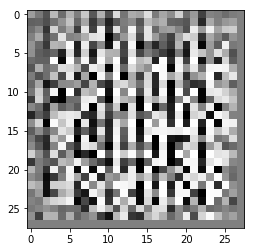

In [19]:
sample_image = generator(z_placeholder, 1, z_dimensions)
z_batch = np.random.normal(-1, 1, size=[1, z_dimensions])
temp = (sess.run(sample_image, feed_dict={z_placeholder: z_batch}))
my_i = temp.squeeze()
plt.imshow(my_i, cmap='gray_r')

# Training Difficulties

One note that I’d like to make is that GANs are notoriously difficult to train. Without the right hyperparameters, network architecture, and training procedure, there is a high chance that either the generator or discriminator will overpower the other. A common case of this is the situation where the generator is able to find a flaw in the discriminator by repeatedly outputting an image that fits the data distribution the discriminator is looking for, but is nowhere close to being a readable MNIST digit. The generator has collapsed onto a single point, and therefore we won’t output a variety of digits. There are also cases where the discriminator becomes too powerful and is able to easily make the distinction between real and fake images. 

제가 작성하고 싶은 한 가지 메모는 GAN이 훈련하기가 악명 높다는 것입니다. 올바른 하이퍼 파라미터, 네트워크 아키텍처 및 교육 절차가 없으면 생성기 또는 판별 기가 다른 하이퍼 매개 변수를 압도 할 가능성이 높습니다. 이에 대한 일반적인 경우는 판별 기가 찾고있는 데이터 분포에 맞는 이미지를 반복적으로 출력하여 판별 기에서 결함을 찾을 수 있지만 읽을 수있는 MNIST 자리가 거의 없습니다. 발전기가 단일 지점에 접 혔기 때문에 다양한 숫자를 출력하지 않습니다. 판별자가 너무 강력 해져 실제 이미지와 가짜 이미지를 쉽게 구별 할 수있는 경우도 있습니다.

The mathematical intuition behind this phenomenon lies in that GANs are typically trained using gradient descent techniques that are designed to find the minimum value of a cost function, rather than to find the Nash equilibrium of a game. When used to seek for a Nash equilibrium, these algorithms may fail to converge. Further research into game theory and stable optimization techniques may result in GANs that are as easy to train as ConvNets!

이 현상의 수학적 직감은 GAN이 일반적으로 게임의 내쉬 균형을 찾는 것보다 비용 함수의 최소값을 찾기 위해 고안된 그래디언트 디센트 기법을 사용하여 훈련된다는 점에 있습니다. 내쉬 평형을 찾는데 사용될 때,이 알고리즘들은 수렴하지 못할 수 있습니다. 게임 이론과 안정적인 최적화 기술에 대한 추가 연구로 ConvNets만큼 쉽게 훈련 할 수 있습니다!

# Closing Thoughts

In this post, we showed how two networks were able to play a minimax game in order to capture the data distribution of the MNIST digits and generate similar looking samples. With applications in video frame prediction, text-image mappings, and more, GANs are definitely the hottest topic in deep learning. Hopefully, with this tutorial, you’ve gained a better understanding of how these networks work in practice and how you can build your own with Tensorflow!

이 글에서는 두 개의 네트워크가 MNIST 숫자의 데이터 분포를 포착하고 유사한 표본을 생성하기 위해 미니 맥스 게임을 어떻게 할 수 있는지를 보여주었습니다. 비디오 프레임 예측, 텍스트 이미지 매핑 등의 응용 프로그램을 사용하면 GAN이 깊은 학습에서 가장 인기있는 주제입니다. 이 튜토리얼에서는 이러한 네트워크가 실제로 어떻게 작동하는지, Tensorflow로 네트워크를 구축하는 방법에 대해 더 잘 이해했기를 바랍니다.

Some more great GAN implementations

DCGAN Tensorflow Implentation: https://github.com/carpedm20/DCGAN-tensorflow

Arthur Juliani's GAN Implementation: https://github.com/awjuliani/TF-Tutorials/blob/master/DCGAN.ipynb 

Brandon Amos's Image Completion Project: https://bamos.github.io/2016/08/09/deep-completion/ 